<a href="https://colab.research.google.com/github/datlt189/AI_LeTienDat_20146151/blob/main/DropOut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar100
from keras.utils import to_categorical
import numpy as np

# Load the CIFAR-100 dataset
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

# Convert pixel values to float and normalize them
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoded vectors
train_labels = to_categorical(train_labels, 100)
test_labels = to_categorical(test_labels, 100)

# Print the shapes of the training and testing data
print('Training images shape:', train_images.shape)
print('Training labels shape:', train_labels.shape)
print('Testing images shape:', test_images.shape)
print('Testing labels shape:', test_labels.shape)

169001437/169001437 [==============================] - 4s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 100)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 100)


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                        

In [3]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=100, batch_size=128, validation_data=(test_images, test_labels))

Epoch 1/100
391/391 [==============================] - 27s 34ms/step - loss: 4.4141 - accuracy: 0.0263 - val_loss: 3.9716 - val_accuracy: 0.0827
Epoch 2/100
391/391 [==============================] - 12s 31ms/step - loss: 3.8103 - accuracy: 0.1083 - val_loss: 3.4237 - val_accuracy: 0.1777
Epoch 3/100
391/391 [==============================] - 13s 32ms/step - loss: 3.4145 - accuracy: 0.1780 - val_loss: 3.0861 - val_accuracy: 0.2475
Epoch 4/100
391/391 [==============================] - 12s 31ms/step - loss: 3.1429 - accuracy: 0.2317 - val_loss: 2.8432 - val_accuracy: 0.2930
Epoch 5/100
391/391 [==============================] - 12s 31ms/step - loss: 2.9438 - accuracy: 0.2689 - val_loss: 2.6794 - val_accuracy: 0.3262
Epoch 6/100
391/391 [==============================] - 12s 31ms/step - loss: 2.7848 - accuracy: 0.2989 - val_loss: 2.5517 - val_accuracy: 0.3533
Epoch 7/100
391/391 [==============================] - 13s 33ms/step - loss: 2.6606 - accuracy: 0.3249 - val_loss: 2.4875 - val_ac

In [4]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 4ms/step - loss: 2.1792 - accuracy: 0.5042
Test accuracy: 0.5041999816894531


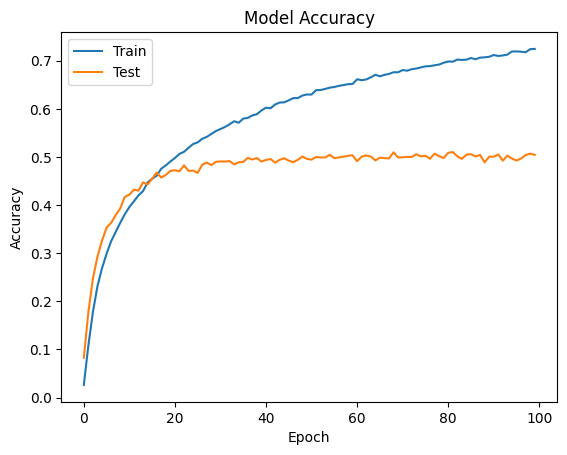

In [5]:
import matplotlib.pyplot as plt

# Save the model weights
model.save_weights('cifar100_dropout.h5')

# Save the training history
np.save('cifar100_dropout_history.npy', history.history)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

NameError: ignored

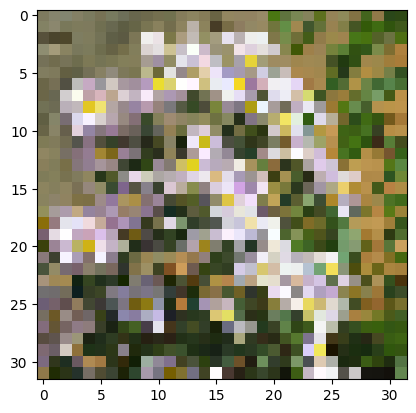

In [1]:
#thu nghiem
from keras.utils import load_img
from keras.utils import img_to_array
import matplotlib.pyplot as plt
import numpy as np

img = load_img('/content/drive/MyDrive/FLOWER/DAISY (1).jpg', target_size=(32, 32, 3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 32*32*3)
img = img.astype('float32')
img = img/255
np.argmax(model.predict(img), axis=-1)